# Pipeline

- Import Packages
- Import Data
- Check Data
- Check Target Feature
- Get Numerical and Categorical Column Names
- Partition Data into y and X
- Train Test Split
- Pre Process Data
- Build Model
- Predict
- Make Submission/Output File
- Export

# Critical Thinking (Asking Questions)

- Why
- What
- When
- How
- Where 

# Import Packages

In [52]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

# Import Data

In [53]:
train_data = pd.read_csv('input/train.csv')
test_data = pd.read_csv('input/test.csv')
submission_data = pd.read_csv('input/sample_submission.csv')

# Check Data
- Meta Data 
    - rows
    - columns
    - size
    - Numerical/Categorical/ID/Dates/Geo/others
    - Missing Values
    - Data Type Conversion (Num to Cat, Cat to Num)

In [54]:
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [55]:
train_data.shape

(18359, 14)

In [56]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [57]:
train_data.describe()

,enrollee_id,city_development_index,training_hours,target
count,18359.000000,18359.000000,18359.000000,18359.000000
mean,16729.360096,0.847140,65.899014,0.132088
std,9643.749725,0.110189,60.885300,0.338595
min,1.000000,0.448000,1.000000,0.000000
25%,8378.500000,0.796000,23.000000,0.000000
50%,16706.000000,0.910000,47.000000,0.000000
75%,25148.500000,0.920000,89.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


# Check Target
- Classification - Check Class Imbalance
- Regression - Check for Normality

<Axes: >

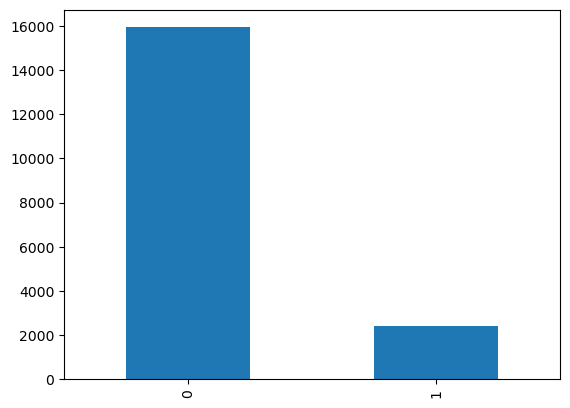

In [58]:
train_data['target'].value_counts().plot.bar()

# Get Num/Cat Column Names

In [59]:
numerical_columns = train_data.drop(['enrollee_id', 'target'], axis = 1).select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()

In [60]:
numerical_columns

['city_development_index', 'training_hours']

In [61]:
categorical_columns

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

# Parition into y & X

In [62]:
y = train_data['target']

# Define the feature variables 'X' (excluding the target and 'id' column)
X = train_data.drop(columns=['enrollee_id', 'target'], axis = 1)
X_test = test_data.drop(columns=['enrollee_id'], axis = 1)

# Cast the spell to split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
print("Training features:", X_train.shape)
print("Testing features:", X_test.shape)
print("Training labels:", y_train.shape)
print("Testing labels:", y_test.shape)

Training features: (14687, 12)
Testing features: (15021, 12)
Training labels: (14687,)
Testing labels: (3672,)


# Pre Processing

### 1. **Cleaning the Cobwebs 🧹**
   - **Handle Missing Values**: Use imputation or drop those sneaky nulls.
   - **Remove Duplicates**: Banish those copycat rows.
   - **Fix Typos & Errors**: Correct those mischievous misspellings.

### 2. **Transforming the Beast 🐲**
   - **Normalization**: Scale the features to a range, like 0 to 1.
   - **Standardization**: Transform to mean = 0 and standard deviation = 1.
   - **Log Transformation**: Apply logarithms to tame the wild skewness.
   - **Categorical Encoding**: Turn categorical gems into numbers with One-Hot or Label Encoding.

### 3. **Feature Engineering: Building Castles 🏰**
   - **Create New Features**: Craft new treasures from the old.
   - **Polynomial Features**: Add complexity with polynomial magic.
   - **Binning**: Divide continuous features into magical bins or groups.

### 4. **Data Reduction: Traveling Light 🎒**
   - **Dimensionality Reduction**: Use PCA or other methods to pack lightly.
   - **Feature Selection**: Choose only the most sparkling gems.

### 5. **Text Preprocessing: Taming the Wordy Dragon 🐉**
   - **Tokenization**: Break text into words or tokens.
   - **Stemming & Lemmatization**: Get to the root of the words.
   - **TF-IDF**: Weigh the words like a wise old owl.

### 6. **Image Preprocessing: Seeing the Unseen 🌌**
   - **Rescaling & Normalizing**: Resize the images and scale the pixel values.
   - **Data Augmentation**: Create new images through rotation, flipping, etc.

### 7. **Time-Series Preprocessing: Time Traveler's Toolkit 🕰️**
   - **Seasonal Decomposition**: Break time-series into trends and seasons.
   - **Lag Features**: Look back in time with lagged features.

# Pre Processing - Getting Started

### 1. **Cleaning**
   - Handle Missing Numerical Values
   - Handle Missing Catetorical Values

### 2. **Transforming the Beast 🐲**
   - Numerical - Standard Scaling
   - Catetegorical - Ordinal Encoding

In [64]:
# Import Package
from sklearn.impute import SimpleImputer

# Create an Instance
num_imputer = SimpleImputer(strategy='median')

# Fit Instance
num_imputer.fit(train_data[numerical_columns])

# Transform 
X_train[numerical_columns] = num_imputer.transform(X_train[numerical_columns])
X_val[numerical_columns] = num_imputer.transform(X_val[numerical_columns])
X_test[numerical_columns] = num_imputer.transform(X_test[numerical_columns])

In [65]:
# Import Package
from sklearn.impute import SimpleImputer

# Create an Instance
cat_imputer = SimpleImputer(strategy='constant', fill_value = 'missing')

# Fit Instance
cat_imputer.fit(train_data[categorical_columns])

# Transform 
X_train[categorical_columns] = cat_imputer.transform(X_train[categorical_columns])
X_val[categorical_columns] = cat_imputer.transform(X_val[categorical_columns])
X_test[categorical_columns] = cat_imputer.transform(X_test[categorical_columns])

In [66]:
# Import Package
from sklearn.preprocessing import StandardScaler

# Create an Instance
standard_scaler = StandardScaler()

# Fit Instance
standard_scaler.fit(X_train[numerical_columns])

# Transform
X_train[numerical_columns] = standard_scaler.transform(X_train[numerical_columns])
X_val[numerical_columns] = standard_scaler.transform(X_val[numerical_columns])
X_test[numerical_columns] = standard_scaler.transform(X_test[numerical_columns])

In [67]:
# Import Package
from sklearn.preprocessing import OrdinalEncoder

# Create an Instance
ordinal_encoder = OrdinalEncoder()

# Fit Instance on the categorical columns
ordinal_encoder.fit(X_train[categorical_columns])

# Transform
X_train[categorical_columns] = ordinal_encoder.transform(X_train[categorical_columns])
X_val[categorical_columns] = ordinal_encoder.transform(X_val[categorical_columns])
X_test[categorical_columns] = ordinal_encoder.transform(X_test[categorical_columns])

# Model

In [68]:
# Import Package
from sklearn.linear_model import LogisticRegression

# Create an Instance
model = LogisticRegression(max_iter=1000)

# Train the Model on the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Predict

In [69]:
# Predict on X_train
predictions_train = model.predict(X_train)

# Predict on X_val
predictions_val = model.predict(X_val)

# Predict on X_test
predictions_test = model.predict(X_test)

In [70]:
submission = pd.DataFrame({
    'enrollee_id': test_data['enrollee_id'],
    'target': predictions_test
})

In [72]:
submission.to_csv('output/submission.csv', index=False)